Лаб. 5

In [ ]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv("data/kl.csv")

# Выбираем числовые столбцы и категориальный столбец "Club"
numerical_columns = [
    "Overall",
    "Potential",
    "ShortPassing",
    "Jersey Number",
    "Age",
    "Dribbling",
    "SprintSpeed",
    "International Reputation",
    "Skill Moves",
    "Weak Foot",
]
categorical_column = "Club"

# Создаем новый DataFrame с выбранными столбцами
selected_columns = numerical_columns + [categorical_column]
df_selected = df[selected_columns]

# Отображаем первые и последние строки
display(df_selected.head())
display(df_selected.tail())

# Уникальные значения в категориальном столбце "Club"
unique_clubs = df_selected[categorical_column].unique()
print(f"Количество уникальных клубов: {len(unique_clubs)}")

# Фильтруем для оставления только 5 клубов
clubs_to_keep = [
    "FC Barcelona",
    "Juventus",
    "Chelsea",
    "Real Madrid",
    "Napoli",
]
df_filtered = df_selected[df_selected["Club"].isin(clubs_to_keep)].copy()

print("Фильтрованная таблица:")
display(df_filtered.head())

print(f"Фильтрованные клубы: {clubs_to_keep}")
unique_clubs = df_filtered[categorical_column].unique()
print(f"Количество уникальных клубов: {len(unique_clubs)}")

Overall  Potential  ShortPassing  Jersey Number   Age  Dribbling  \
0     94.0         94          90.0           10.0  31.0       97.0   
1     94.0         94          81.0            7.0  33.0       88.0   
2     92.0         93          84.0           10.0  26.0       96.0   
3     91.0         93          50.0            1.0  27.0       18.0   
4     91.0         92          92.0            7.0  27.0       86.0   

   SprintSpeed  International Reputation  Skill Moves  Weak Foot  \
0         86.0                       5.0          4.0        4.0   
1         91.0                       5.0          5.0        4.0   
2         90.0                       5.0          5.0        5.0   
3         58.0                       4.0          1.0        3.0   
4         76.0                       4.0          4.0        5.0   

                  Club  
0         FC Barcelona  
1             Juventus  
2  Paris Saint-Germain  
3    Manchester United  
4      Manchester City

Overall  Potential  ShortPassing  Jersey Number   Age  Dribbling  \
18202     47.0         65          49.0           22.0  19.0       42.0   
18203     47.0         63          43.0           21.0  19.0       39.0   
18204     47.0         67          38.0           33.0  16.0       45.0   
18205     47.0         66          42.0           34.0  17.0       51.0   
18206     46.0         66          48.0           33.0  16.0       43.0   

       SprintSpeed  International Reputation  Skill Moves  Weak Foot  \
18202         57.0                       1.0          2.0        2.0   
18203         39.0                       1.0          2.0        2.0   
18204         69.0                       1.0          2.0        3.0   
18205         60.0                       1.0          2.0        3.0   
18206         55.0                       1.0          2.0        3.0   

                   Club  
18202   Crewe Alexandra  
18203    Trelleborgs FF  
18204  Cambridge United  
18205   Tranmere Rovers  
18206   Tranmere Rovers

Количество уникальных клубов: 652
Фильтрованная таблица:


Overall  Potential  ShortPassing  Jersey Number   Age  Dribbling  \
0     94.0         94          90.0           10.0  31.0       97.0   
1     94.0         94          81.0            7.0  33.0       88.0   
5     91.0         91          89.0           10.0  27.0       95.0   
6     91.0         91          93.0           10.0  32.0       90.0   
7     91.0         91          82.0            9.0  31.0       87.0   

   SprintSpeed  International Reputation  Skill Moves  Weak Foot          Club  
0         86.0                       5.0          4.0        4.0  FC Barcelona  
1         91.0                       5.0          5.0        4.0      Juventus  
5         88.0                       4.0          4.0        4.0       Chelsea  
6         72.0                       4.0          4.0        4.0   Real Madrid  
7         75.0                       5.0          3.0        4.0  FC Barcelona

Фильтрованные клубы: ['FC Barcelona', 'Juventus', 'Chelsea', 'Real Madrid', 'Napoli']
Количество уникальных клубов: 5


Визуализация данных (с учетом особенностей)

Overall  Potential  ShortPassing  Jersey Number   Age  Dribbling  \
0     94.0         94          90.0           10.0  31.0       97.0   
1     94.0         94          81.0            7.0  33.0       88.0   
5     91.0         91          89.0           10.0  27.0       95.0   
6     91.0         91          93.0           10.0  32.0       90.0   
7     91.0         91          82.0            9.0  31.0       87.0   

   SprintSpeed  International Reputation  Skill Moves  Weak Foot  \
0         86.0                       5.0          4.0        4.0   
1         91.0                       5.0          5.0        4.0   
5         88.0                       4.0          4.0        4.0   
6         72.0                       4.0          4.0        4.0   
7         75.0                       5.0          3.0        4.0   

           Club  ClubIndex  
0  FC Barcelona          0  
1      Juventus          1  
5       Chelsea          2  
6   Real Madrid          3  
7  FC Barcelona          0

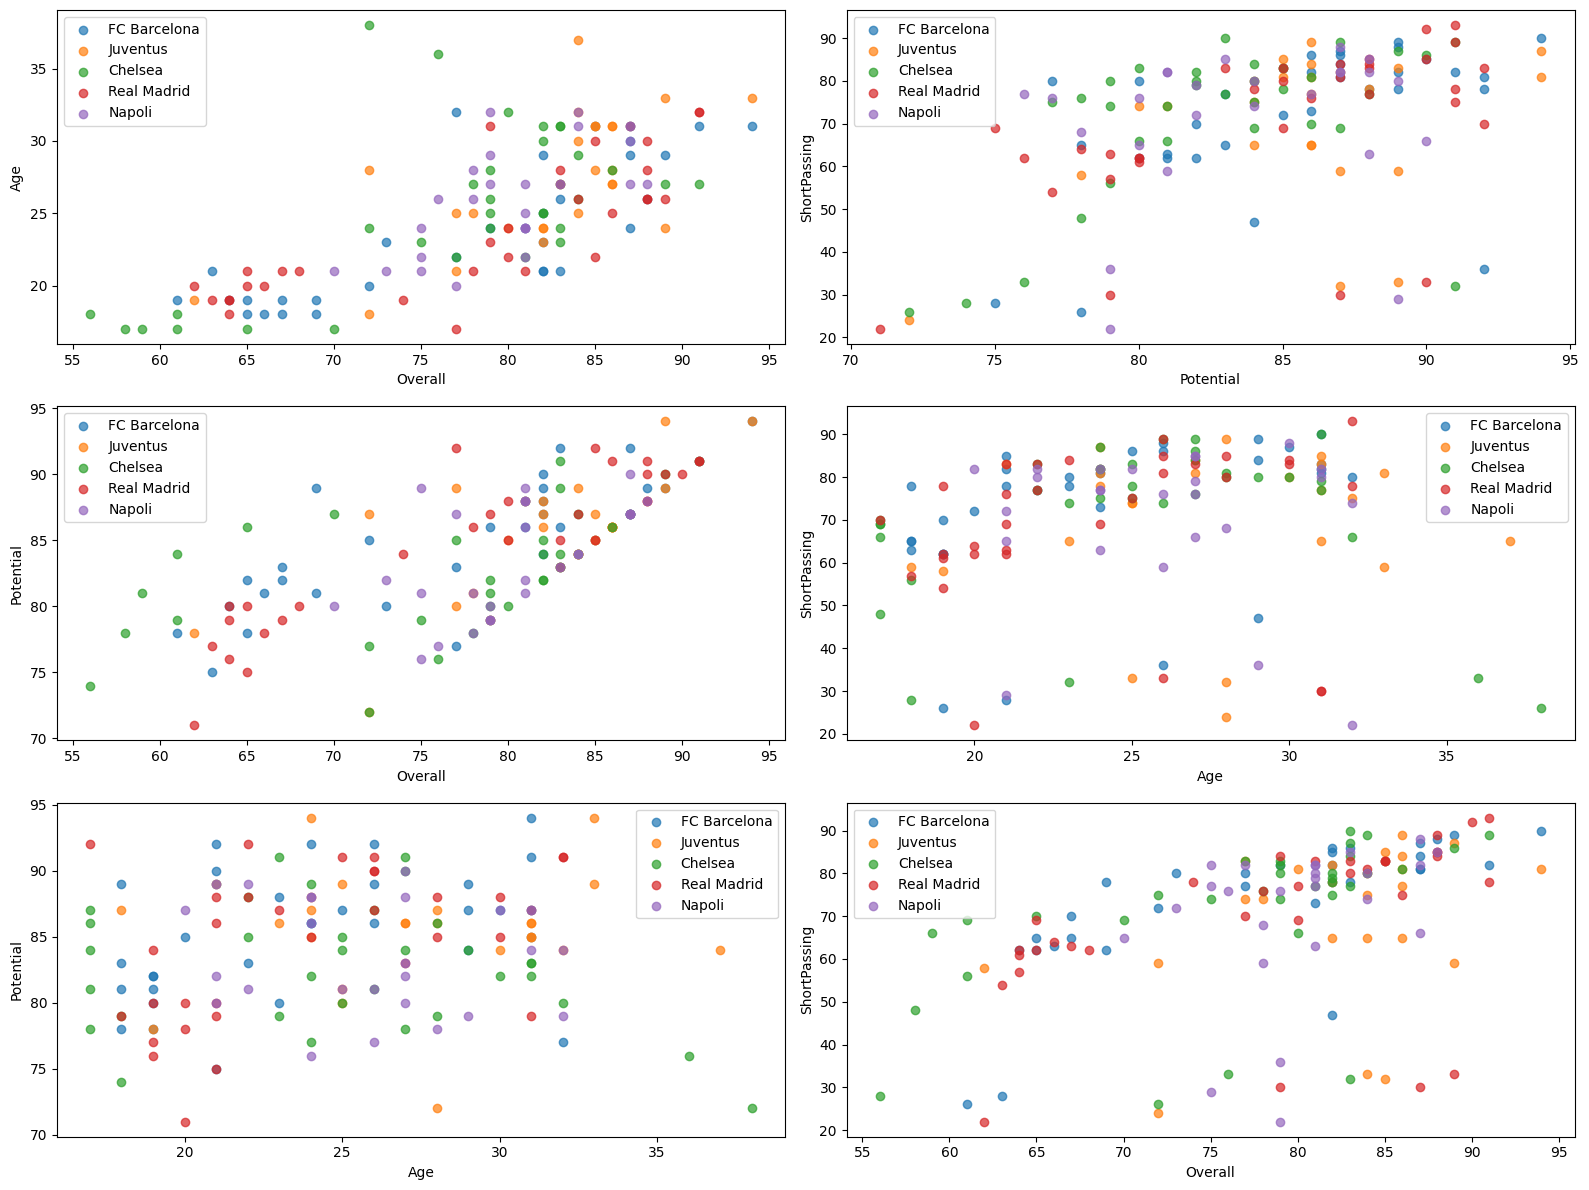

In [ ]:
import matplotlib.pyplot as plt


def draw_data_2d(data, x_col, y_col, labels, label_names, subplot, color=None):
    # Если задан параметр color, используем его для всех точек
    if color is not None:
        subplot.scatter(data[x_col], data[y_col], color=color, alpha=0.7)
    else:
        # Если color не задан, рисуем для каждой категории свой цвет
        for idx, label_name in enumerate(label_names):
            filtered = data[data["ClubIndex"] == idx]  # Фильтрация данных по метке
            subplot.scatter(
                filtered[x_col], filtered[y_col], label=label_name, alpha=0.7
            )

    # Оформление графика
    subplot.set_xlabel(x_col)
    subplot.set_ylabel(y_col)
    subplot.legend()


# Получаем список уникальных клубов и их индексы
clubs = df_filtered["Club"].unique()
club_to_index = {club: idx for idx, club in enumerate(clubs)}

# Добавляем столбец ClubIndex
df_filtered["ClubIndex"] = df_filtered["Club"].map(club_to_index)

# Проверяем результат
display(df_filtered.head())

# Подготовка данных для визуализации
y = df_filtered["ClubIndex"]
y_names = clubs

# Визуализация
plt.figure(figsize=(16, 12))
draw_data_2d(df_filtered, "Overall", "Age", y.tolist(), y_names, plt.subplot(3, 2, 1))
draw_data_2d(
    df_filtered,
    "Potential",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 2),
)
draw_data_2d(
    df_filtered, "Overall", "Potential", y.tolist(), y_names, plt.subplot(3, 2, 3)
)
draw_data_2d(
    df_filtered,
    "Age",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 4),
)
draw_data_2d(df_filtered, "Age", "Potential", y.tolist(), y_names, plt.subplot(3, 2, 5))
draw_data_2d(
    df_filtered,
    "Overall",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 6),
)

plt.tight_layout()
plt.show()

Визуализация данных (без учета особенностей)

C:\Users\Ruslan\AppData\Local\Temp\ipykernel_14468\2566301338.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  subplot.legend()


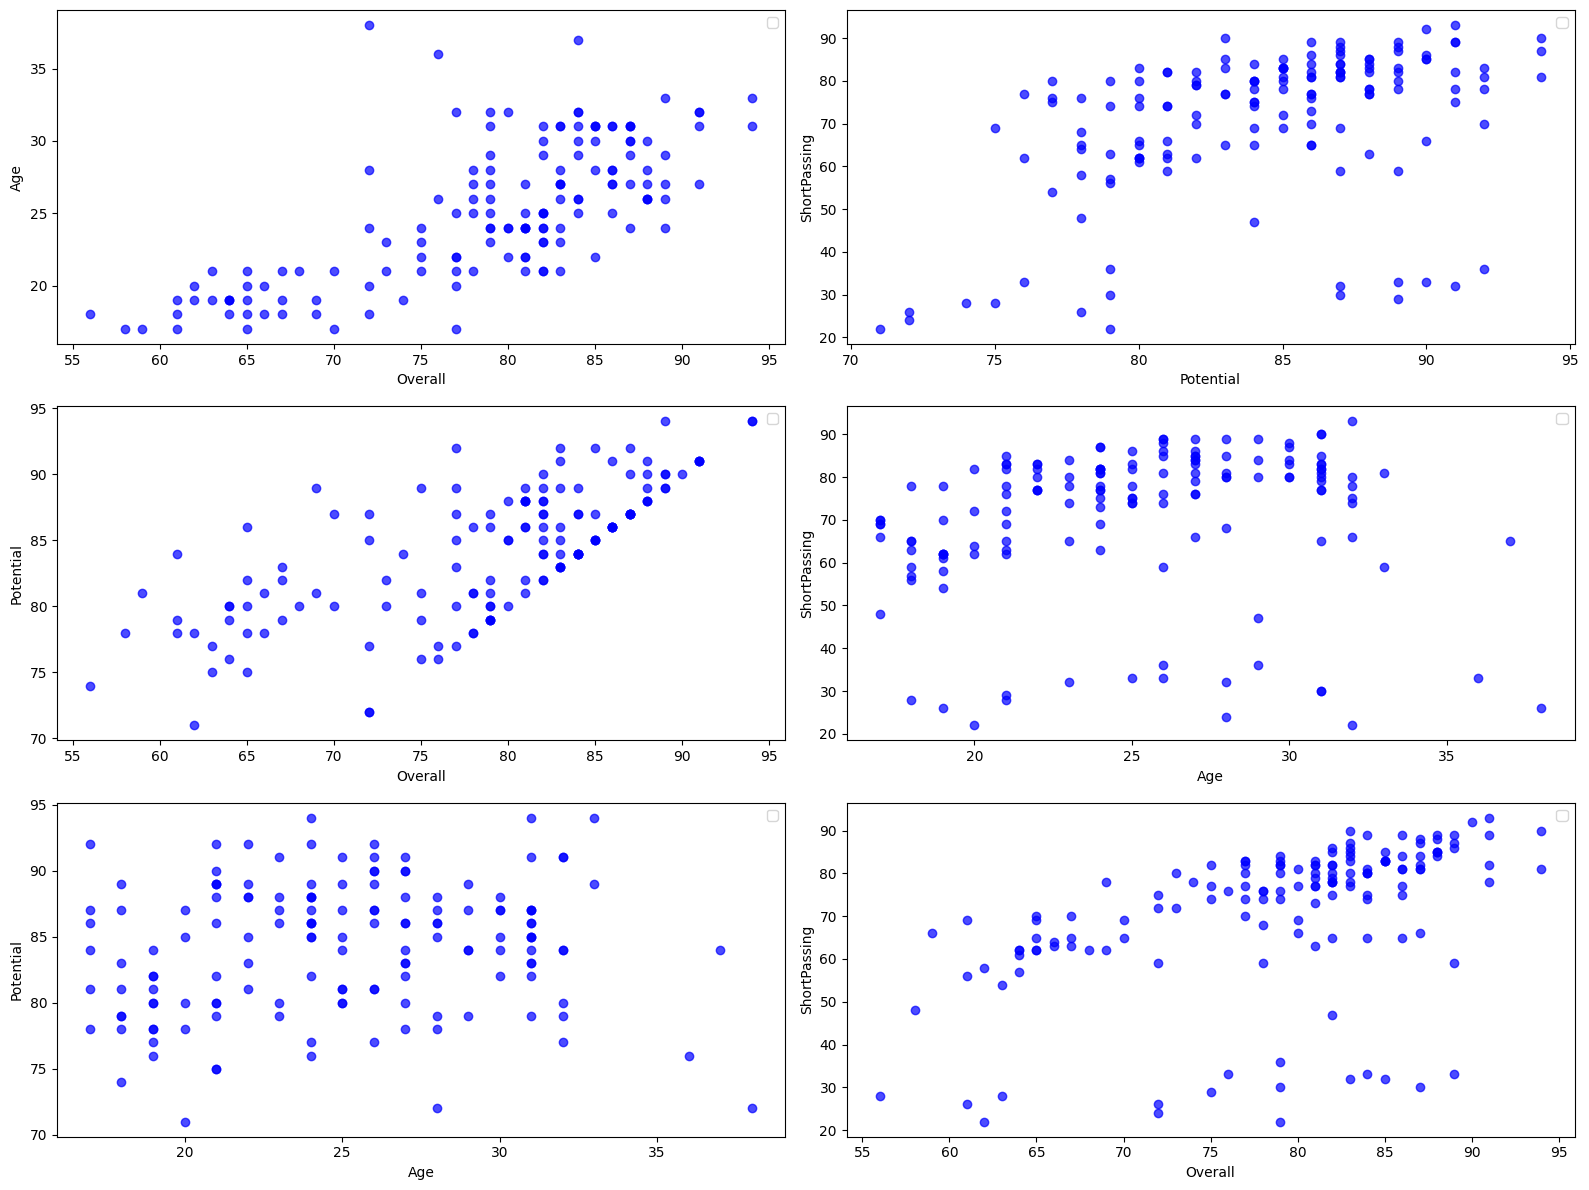

In [ ]:
# Создаём фигуру
plt.figure(figsize=(16, 12))

# Указываем цвет для точек
color = "blue"

draw_data_2d(
    df_filtered,
    "Overall",
    "Age",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 1),
    color=color,
)
draw_data_2d(
    df_filtered,
    "Potential",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 2),
    color=color,
)
draw_data_2d(
    df_filtered,
    "Overall",
    "Potential",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 3),
    color=color,
)
draw_data_2d(
    df_filtered,
    "Age",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 4),
    color=color,
)
draw_data_2d(
    df_filtered,
    "Age",
    "Potential",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 5),
    color=color,
)
draw_data_2d(
    df_filtered,
    "Overall",
    "ShortPassing",
    y.tolist(),
    y_names,
    plt.subplot(3, 2, 6),
    color=color,
)

plt.tight_layout()
plt.show()

Иерархическая агломеративная кластеризация (+дендрограмма)

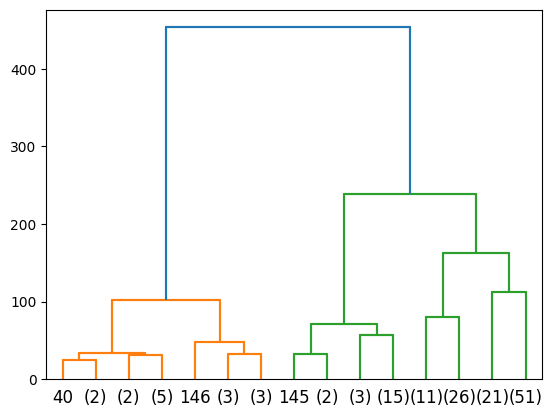

In [5]:
from utils_clusters import get_linkage_matrix, run_agglomerative
from visual import draw_dendrogram
from scipy.cluster import hierarchy

df_filtered_noclub = df_filtered.drop(columns=["Club"])
df_filtered_noclub_nona = df_filtered_noclub.dropna()
tree = run_agglomerative(df_filtered_noclub_nona)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")

Получение результатов иерархической кластеризации (+сравнение со случайным разбиением)

ARI между иерархической кластеризацией и реальными метками: 0.16557998538946547
ARI между случайным разбиением и реальными метками: -0.0059212373344222965


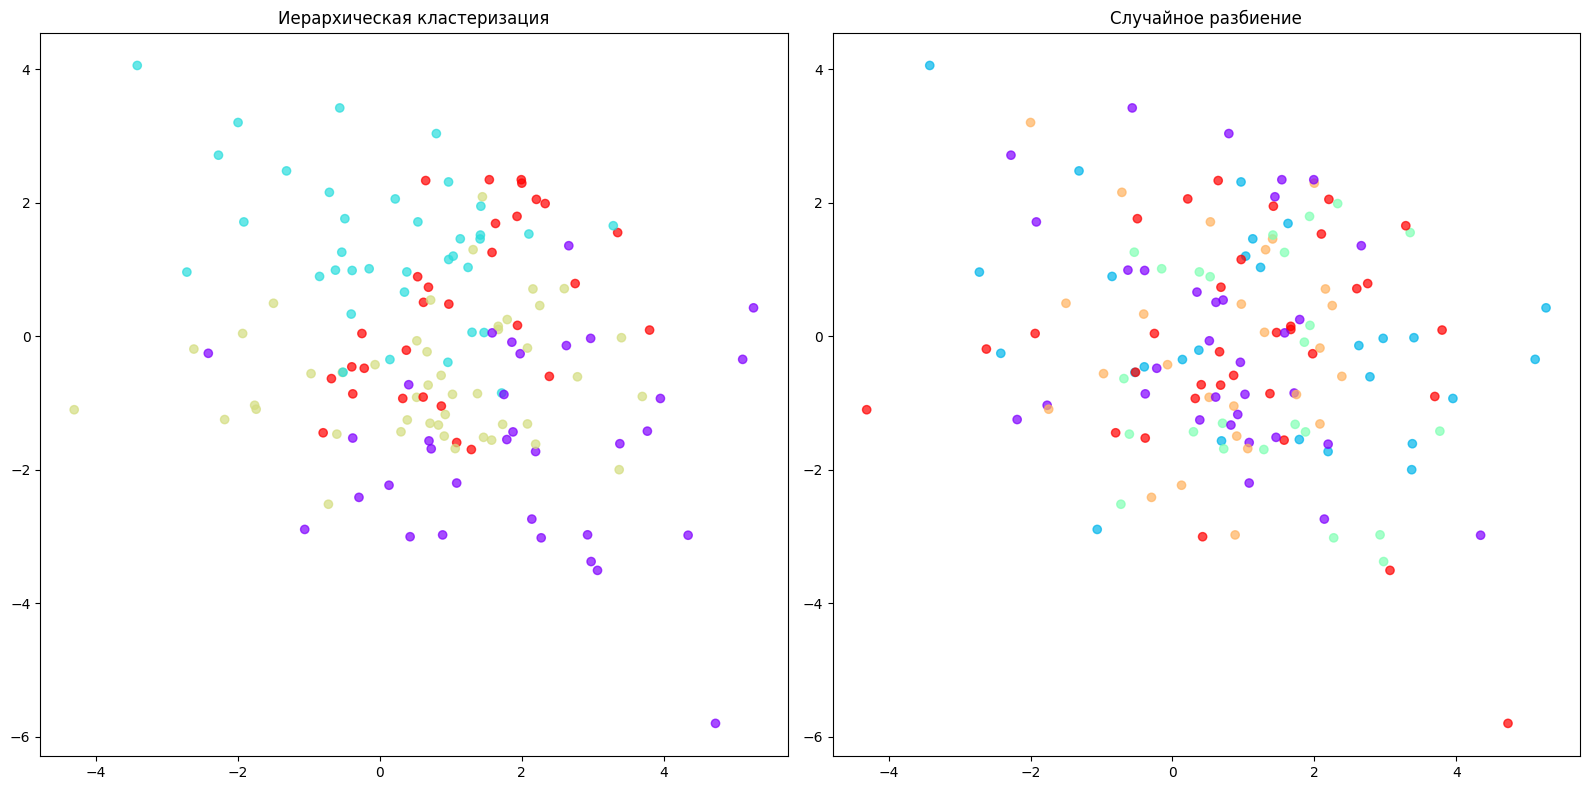

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Генерация данных
X, y = make_classification(n_samples=144, n_features=10, n_informative=6, n_classes=4)

# 1. Иерархическая кластеризация
agglomerative = AgglomerativeClustering(n_clusters=4)
cluster_labels_agg = agglomerative.fit_predict(X)

# 2. Случайное разбиение на 5 кластера
random_labels = np.random.randint(0, 5, size=len(X))

# 3. Сравнение результатов кластеризации
ari_score = adjusted_rand_score(y, cluster_labels_agg)
ari_random = adjusted_rand_score(y, random_labels)

# Близко к 1 - супер, близко к 0 - плохо
print(f"ARI между иерархической кластеризацией и реальными метками: {ari_score}")
print(f"ARI между случайным разбиением и реальными метками: {ari_random}")

# Визуализация кластеров
plt.figure(figsize=(16, 8))

# Кластеры на основе иерархической кластеризации
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_agg, cmap="rainbow", alpha=0.7)
plt.title("Иерархическая кластеризация")

# Случайное разбиение
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=random_labels, cmap="rainbow", alpha=0.7)
plt.title("Случайное разбиение")

plt.tight_layout()
plt.show()

Неирархическая кластеризация

In [7]:
from utils_clusters import print_cluster_result, run_kmeans

# Предположим, что у вас есть DataFrame df с нужными данными
random_state = 9

# Выполняем кластеризацию KMeans
labels, centers = run_kmeans(df_filtered_noclub_nona, 2, random_state)

# Выводим результаты кластеризации
print_cluster_result(df_filtered_noclub_nona, 2, labels)
display(centers)
display(df_filtered_noclub_nona.head())  # Выводим несколько строк для проверки

Cluster 1 (127):
0, 1, 5, 6, 7, 8, 14, 15, 20, 24, 27, 29, 30, 32, 35, 36, 42, 44, 49, 50, 52, 53, 54, 62, 64, 65, 69, 70, 72, 73, 79, 96, 99, 103, 105, 121, 123, 129, 137, 139, 140, 150, 152, 155, 172, 176, 188, 190, 192, 200, 209, 219, 228, 236, 239, 243, 245, 247, 257, 263, 265, 283, 304, 324, 326, 328, 336, 339, 340, 350, 358, 367, 417, 430, 448, 534, 573, 590, 613, 615, 641, 646, 681, 754, 781, 815, 817, 858, 1007, 1037, 1049, 1085, 1143, 1149, 1156, 1254, 1616, 1664, 1859, 2513, 2769, 3118, 3311, 3418, 3684, 5121, 5179, 6000, 6102, 6724, 8284, 8289, 8857, 9141, 10178, 10269, 10526, 10801, 11163, 11300, 11327, 11877, 12504, 13896, 14603, 14646, 15322

--------
Cluster 2 (20):
19, 46, 92, 128, 177, 266, 690, 697, 702, 1287, 1763, 3700, 3937, 8732, 10777, 12502, 13687, 14286, 15846, 16806

--------


array([[79.48818898, 84.80314961, 76.63779528, 17.51968504, 24.99212598,
        74.77165354, 73.73228346,  2.26771654,  3.12598425,  3.33858268,
         1.94488189],
       [73.7       , 80.35      , 34.35      , 20.65      , 25.55      ,
        16.15      , 44.7       ,  1.75      ,  1.15      ,  2.75      ,
         2.        ]])

Overall  Potential  ShortPassing  Jersey Number   Age  Dribbling  \
0     94.0         94          90.0           10.0  31.0       97.0   
1     94.0         94          81.0            7.0  33.0       88.0   
5     91.0         91          89.0           10.0  27.0       95.0   
6     91.0         91          93.0           10.0  32.0       90.0   
7     91.0         91          82.0            9.0  31.0       87.0   

   SprintSpeed  International Reputation  Skill Moves  Weak Foot  ClubIndex  
0         86.0                       5.0          4.0        4.0          0  
1         91.0                       5.0          5.0        4.0          1  
5         88.0                       4.0          4.0        4.0          2  
6         72.0                       4.0          4.0        4.0          3  
7         75.0                       5.0          3.0        4.0          0

Визуализация результатов кластеризации

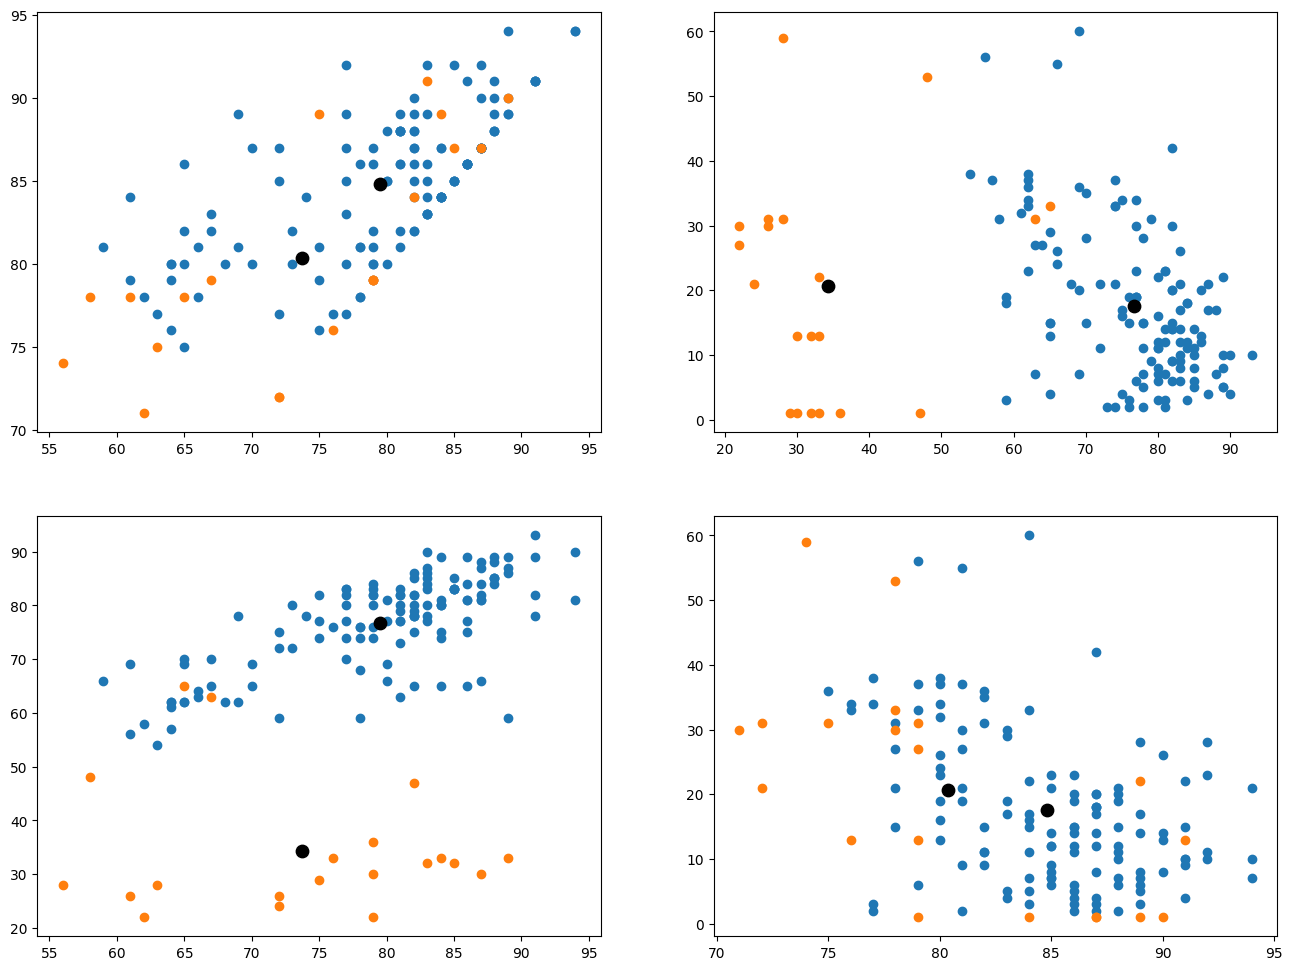

In [8]:
from visual import draw_cluster_results

plt.figure(figsize=(16, 12))
draw_cluster_results(df_filtered_noclub_nona, 0, 1, labels, centers, plt.subplot(2, 2, 1))
draw_cluster_results(df_filtered_noclub_nona, 2, 3, labels, centers, plt.subplot(2, 2, 2))
draw_cluster_results(df_filtered_noclub_nona, 0, 2, labels, centers, plt.subplot(2, 2, 3))
draw_cluster_results(df_filtered_noclub_nona, 1, 3, labels, centers, plt.subplot(2, 2, 4))

Разбиение на 5 кластеров и сравнение с реальным разбиением

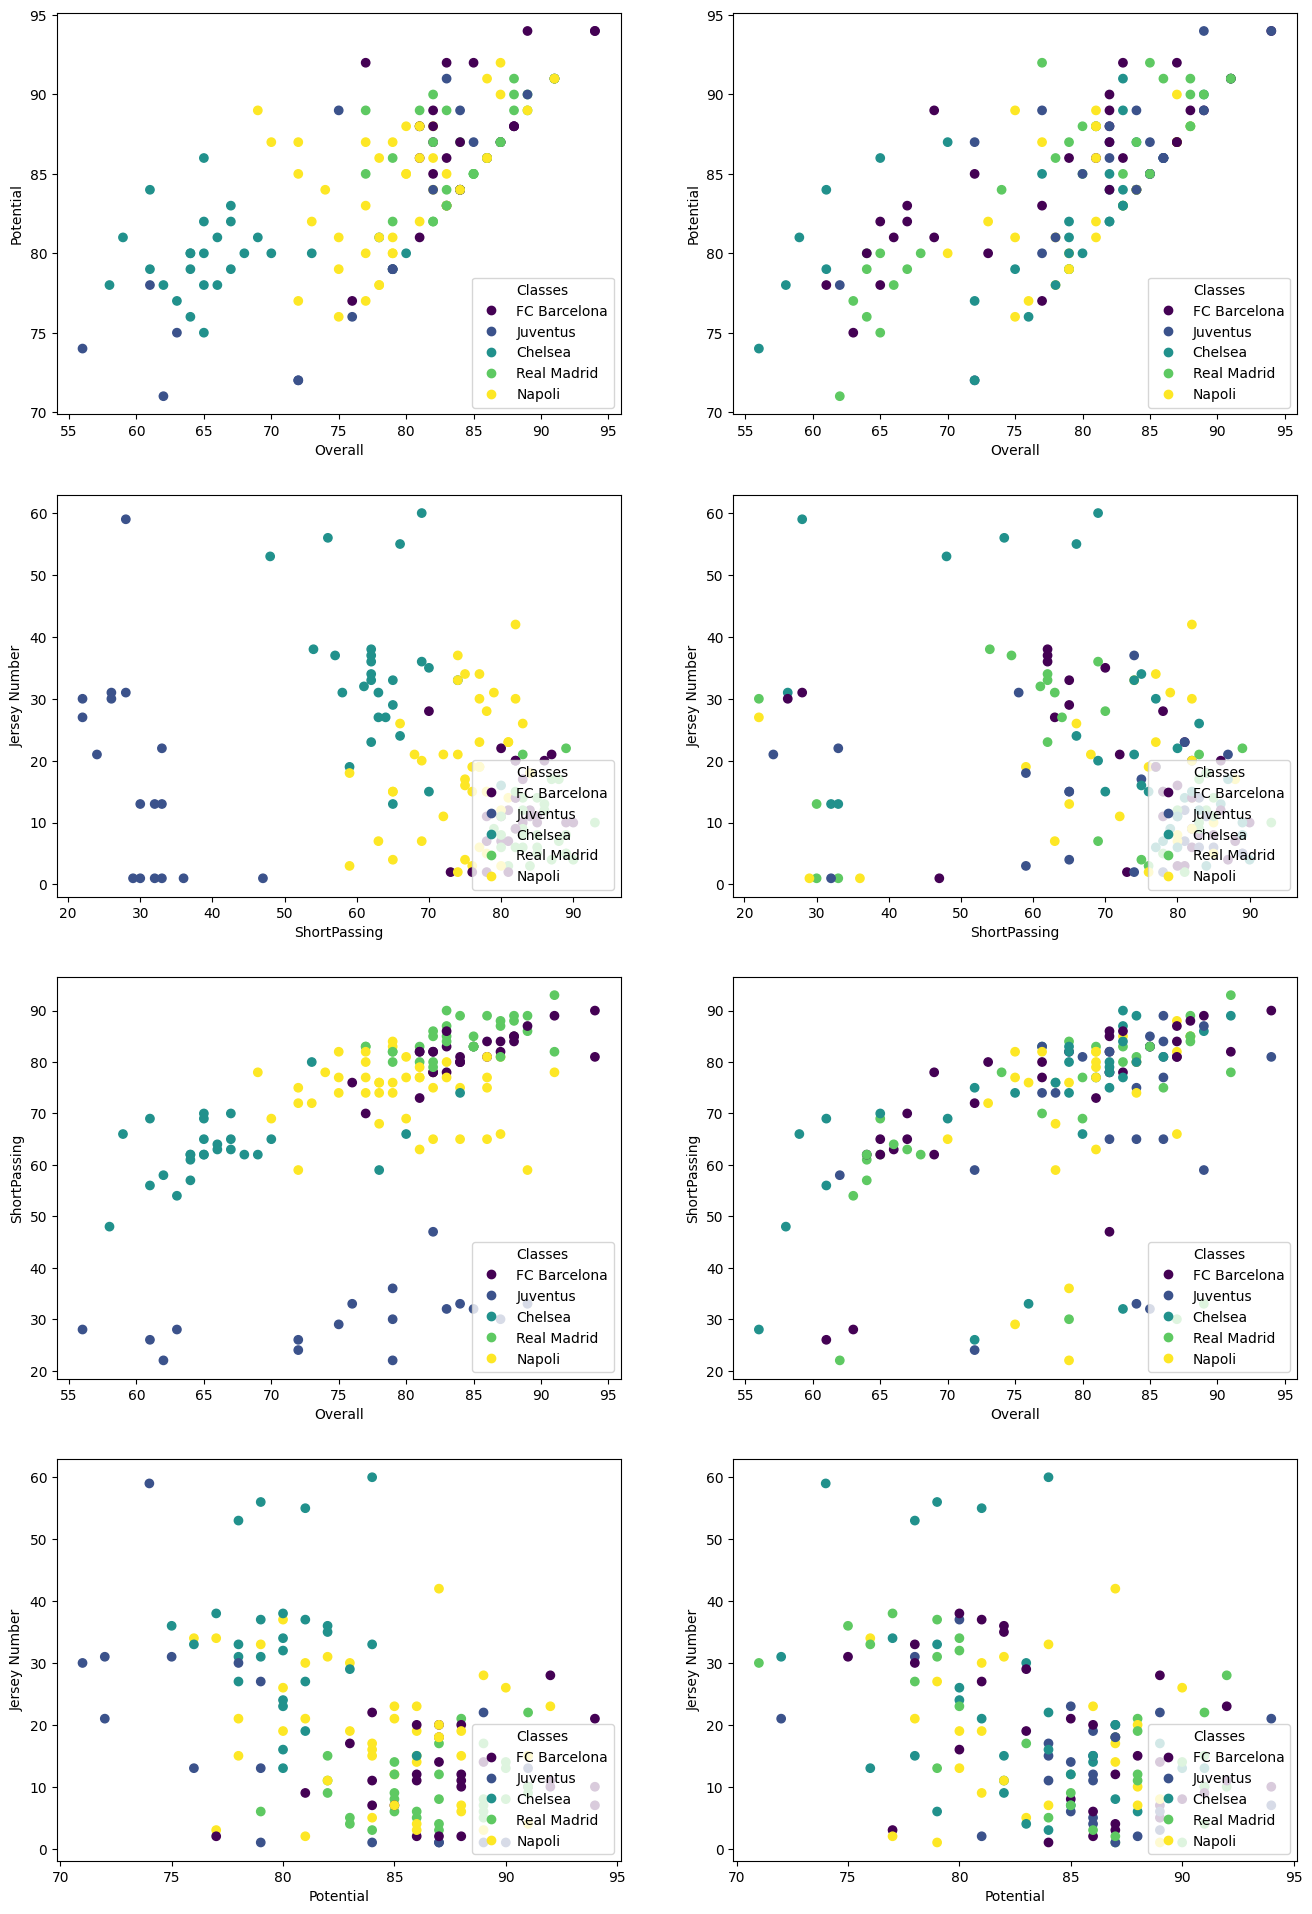

In [9]:
from visual import draw_data_2d

labels, centers = run_kmeans(df_filtered_noclub_nona, 5, random_state)

yy = df_filtered_noclub_nona["ClubIndex"]

plt.figure(figsize=(16, 24))
draw_data_2d(
    df_filtered_noclub_nona, 0, 1, labels.tolist(), y_names, plt.subplot(4, 2, 1)
)
draw_data_2d(df_filtered_noclub_nona, 0, 1, yy.tolist(), y_names, plt.subplot(4, 2, 2))
draw_data_2d(
    df_filtered_noclub_nona, 2, 3, labels.tolist(), y_names, plt.subplot(4, 2, 3)
)
draw_data_2d(df_filtered_noclub_nona, 2, 3, yy.tolist(), y_names, plt.subplot(4, 2, 4))
draw_data_2d(
    df_filtered_noclub_nona, 0, 2, labels.tolist(), y_names, plt.subplot(4, 2, 5)
)
draw_data_2d(df_filtered_noclub_nona, 0, 2, yy.tolist(), y_names, plt.subplot(4, 2, 6))
draw_data_2d(
    df_filtered_noclub_nona, 1, 3, labels.tolist(), y_names, plt.subplot(4, 2, 7)
)
draw_data_2d(df_filtered_noclub_nona, 1, 3, yy.tolist(), y_names, plt.subplot(4, 2, 8))

Понижение размерности до n=2

In [10]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_filtered_noclub_nona)
reduced_data

array([[ 4.24262881e+01, -8.58747627e+00],
       [ 3.35801830e+01, -1.29830105e+01],
       [ 4.04959418e+01, -6.22355075e+00],
       [ 3.27480265e+01, -9.53127256e+00],
       [ 2.60581781e+01, -1.05746609e+01],
       [ 5.84844198e+00, -1.07567293e+01],
       [ 2.25820806e+01, -6.77394030e+00],
       [ 3.38320096e+01,  3.06672924e+00],
       [-6.19442143e+01, -3.21578541e+01],
       [ 1.55854797e+01, -1.54742530e+01],
       [-6.76123495e+00, -2.08022645e+01],
       [ 9.40078003e+00, -8.34388336e+00],
       [ 3.32929954e+01, -5.62124449e+00],
       [ 3.03217103e+01,  3.72556770e+00],
       [ 3.17224922e+01, -8.66653896e+00],
       [ 3.10410788e+01, -4.91871630e+00],
       [ 3.45926138e+01, -5.00978414e+00],
       [ 9.33967159e+00,  3.25311479e-01],
       [-4.34610458e-01,  2.06307453e+00],
       [-6.14013872e+01, -3.11698049e+01],
       [ 2.71110656e+01, -4.02019191e-01],
       [ 3.14040335e+01, -2.41699895e+00],
       [ 2.38236835e+01, -2.04499950e+00],
       [ 1.

Визуализация данных после понижения

[[ 4.24262881e+01 -8.58747627e+00]
 [ 3.35801830e+01 -1.29830105e+01]
 [ 4.04959418e+01 -6.22355075e+00]
 [ 3.27480265e+01 -9.53127256e+00]
 [ 2.60581781e+01 -1.05746609e+01]
 [ 5.84844198e+00 -1.07567293e+01]
 [ 2.25820806e+01 -6.77394030e+00]
 [ 3.38320096e+01  3.06672924e+00]
 [-6.19442143e+01 -3.21578541e+01]
 [ 1.55854797e+01 -1.54742530e+01]
 [-6.76123495e+00 -2.08022645e+01]
 [ 9.40078003e+00 -8.34388336e+00]
 [ 3.32929954e+01 -5.62124449e+00]
 [ 3.03217103e+01  3.72556770e+00]
 [ 3.17224922e+01 -8.66653896e+00]
 [ 3.10410788e+01 -4.91871630e+00]
 [ 3.45926138e+01 -5.00978414e+00]
 [ 9.33967159e+00  3.25311479e-01]
 [-4.34610458e-01  2.06307453e+00]
 [-6.14013872e+01 -3.11698049e+01]
 [ 2.71110656e+01 -4.02019191e-01]
 [ 3.14040335e+01 -2.41699895e+00]
 [ 2.38236835e+01 -2.04499950e+00]
 [ 1.98906152e+01 -1.40010106e+01]
 [-8.42217331e-01 -2.02065634e+01]
 [ 4.37543202e+00 -1.67445994e+01]
 [ 2.32411925e+01 -4.89906066e+00]
 [ 3.64478991e+01 -2.68727510e+00]
 [ 1.10743894e+01 -6

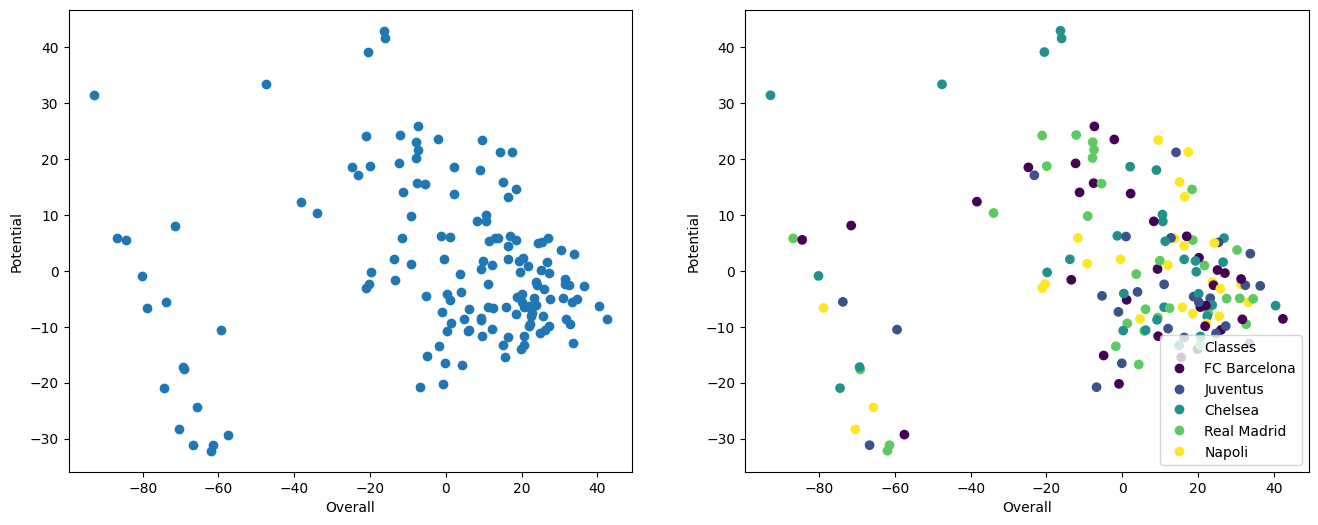

In [ ]:
# данные после понижения размерности
plt.figure(figsize=(16, 6))

print(reduced_data)

# Первый график: отображение кластеров с метками
draw_data_2d(
    pd.DataFrame(
        {"Overall": reduced_data[:, 0], "Potential": reduced_data[:, 1]}
    ),
    0,
    1,
    subplot=plt.subplot(1, 2, 1),
)

# Второй график: отображение с метками кластеров из y
draw_data_2d(
    pd.DataFrame(
        {"Overall": reduced_data[:, 0], "Potential": reduced_data[:, 1]}
    ),
    0,
    1,
    yy.tolist(),
    y_names,
    plt.subplot(1, 2, 2),
)

Визуализация результатов неиерархической кластеризации для двух кластеров с учетом понижения размерности

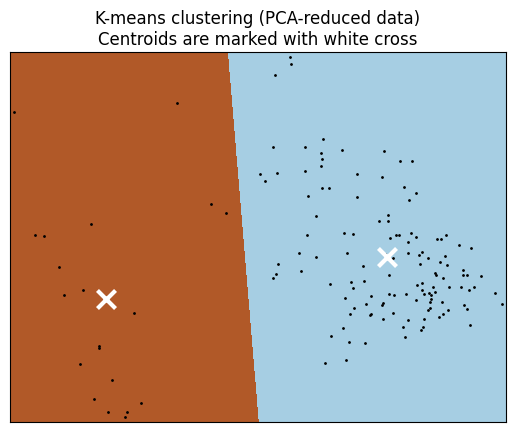

In [12]:
from utils_clusters import fit_kmeans
from visual import draw_clusters


kmeans = fit_kmeans(reduced_data, 2, random_state)
draw_clusters(reduced_data, kmeans)

Визуализация результатов неиерархической кластеризации для пяти кластеров с учетом понижения размерности

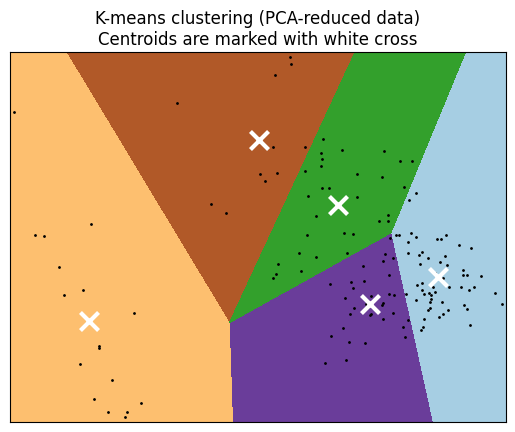

In [18]:
kmeans = fit_kmeans(reduced_data, 5, random_state)
draw_clusters(reduced_data, kmeans)

Сравнение результатов кластеризации с реальным разбиением с учетом понижения размерности

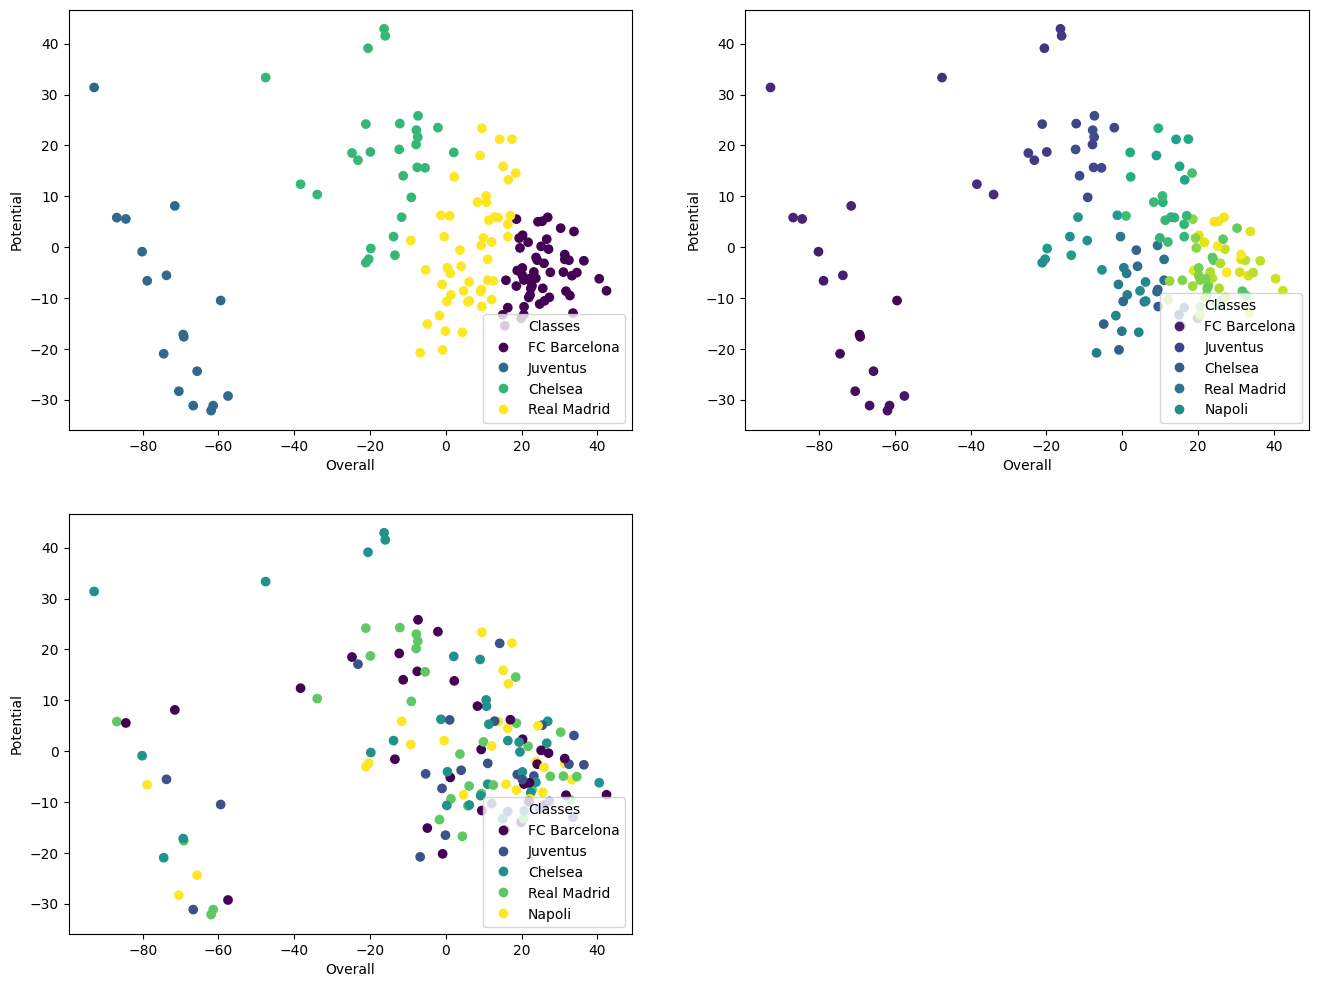

In [14]:
labels = [2 if val == 1 else 1 if val == 2 else val for val in kmeans.labels_]

plt.figure(figsize=(16, 12))
draw_data_2d(
    pd.DataFrame({"Overall": reduced_data[:, 0], "Potential": reduced_data[:, 1]}),
    0,
    1,
    labels,
    y_names,
    plt.subplot(2, 2, 1),
)
draw_data_2d(
    pd.DataFrame({"Overall": reduced_data[:, 0], "Potential": reduced_data[:, 1]}),
    0,
    1,
    result,
    y_names,
    plt.subplot(2, 2, 2),
)
draw_data_2d(
    pd.DataFrame({"Overall": reduced_data[:, 0], "Potential": reduced_data[:, 1]}),
    0,
    1,
    yy.tolist(),
    y_names,
    plt.subplot(2, 2, 3),
)

### Выбор количества кластеров на основе инерции
Инерция - сумма квадратов расстояний выборок до ближайшего центра кластера, взвешенная по весам выборок, если таковые имеются.

range(2, 13)

[88724.65511811024,
 58680.50738611234,
 50313.51330829106,
 45319.272574621245,
 41013.384307408094,
 38094.87539190409,
 32321.27378881988,
 29051.591095598113,
 27690.913830248697,
 26830.519788055084,
 25677.68645472175]

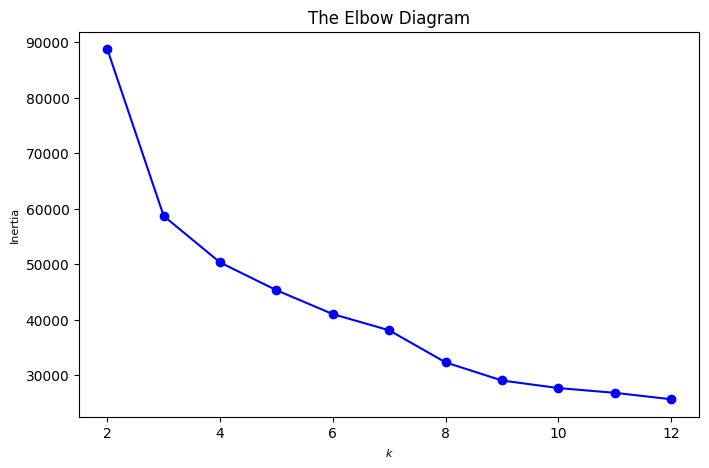

In [15]:
from utils_clusters import get_clusters_inertia
from visual import draw_elbow_diagram


inertias, clusters_range = get_clusters_inertia(df_filtered_noclub_nona, random_state)
display(clusters_range)
display(inertias)
draw_elbow_diagram(inertias, clusters_range)

Выбор количества кластеров на основе коэффициента силуэта¶
Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (а) и среднего расстояния до ближайшего кластера (b) для каждого образца. Коэффициент силуэта для образца равен (b - a) / max(a, b). Для пояснения: b — это расстояние между образцом и ближайшим кластером, частью которого образец не является. Обратите внимание, что коэффициент силуэта определяется только в том случае, если количество меток равно 2 <= n_labels <= n_samples - 1.

Эта функция возвращает средний коэффициент силуэта по всем образцам.

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру.

range(2, 13)

[0.6014604423677362,
 0.40641016226313986,
 0.2607618424596132,
 0.24680408556961408,
 0.25520393257177015,
 0.24832308156641922,
 0.23714224866284933,
 0.2568055911613917,
 0.2210390156434532,
 0.20567375653912975,
 0.19990886356213602]

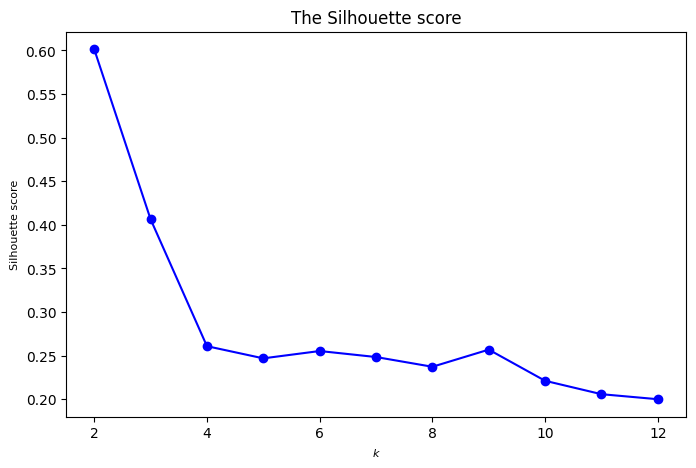

In [16]:
from utils_clusters import get_clusters_silhouette_scores
from visual import draw_silhouettes_diagram

silhouette_scores, clusters_range = get_clusters_silhouette_scores(df_filtered_noclub_nona, random_state)
display(clusters_range)
display(silhouette_scores)
draw_silhouettes_diagram(silhouette_scores, clusters_range)

Пример анализа силуэтов для разбиения от 2 до 12 кластеров

https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

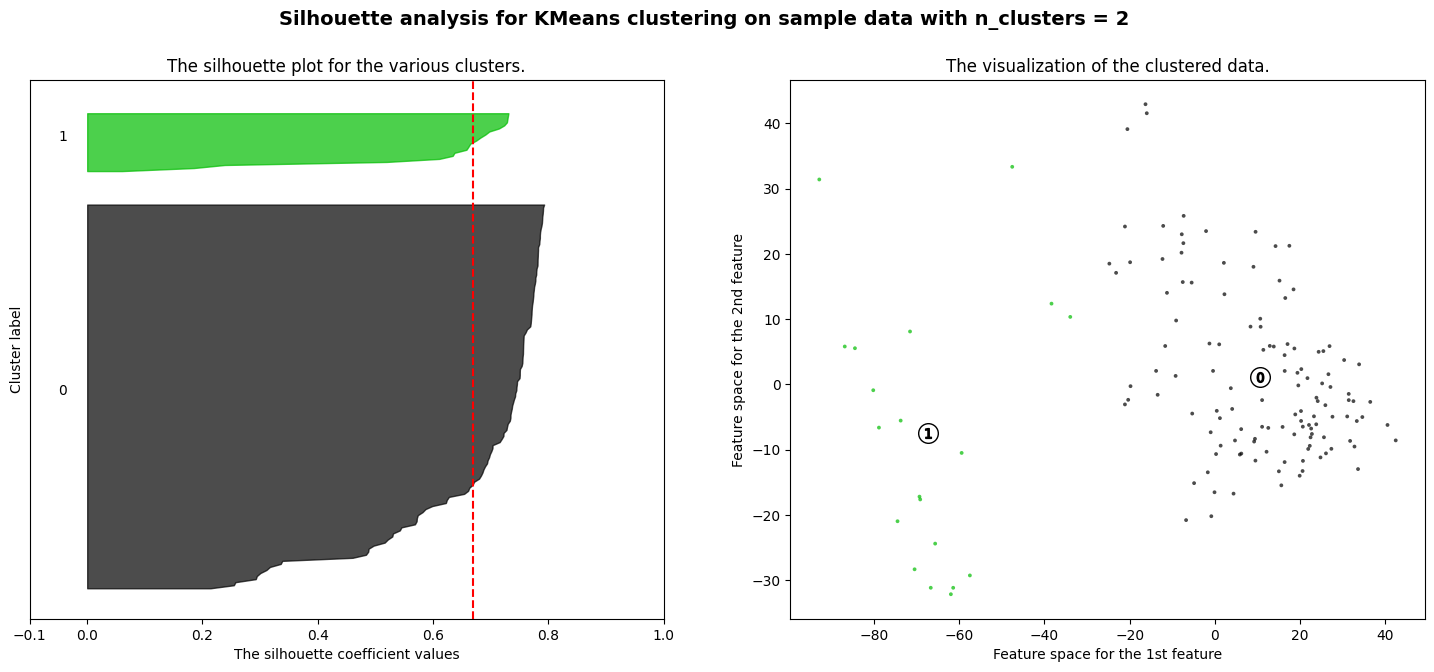

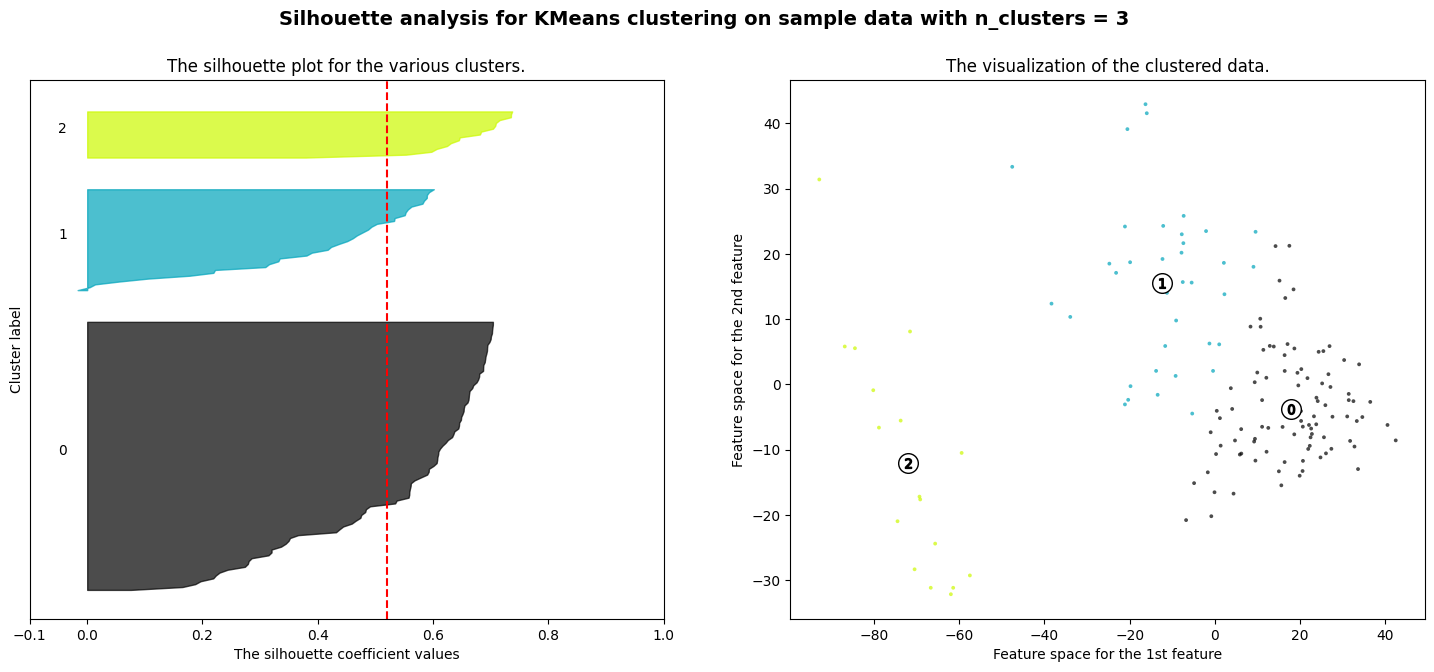

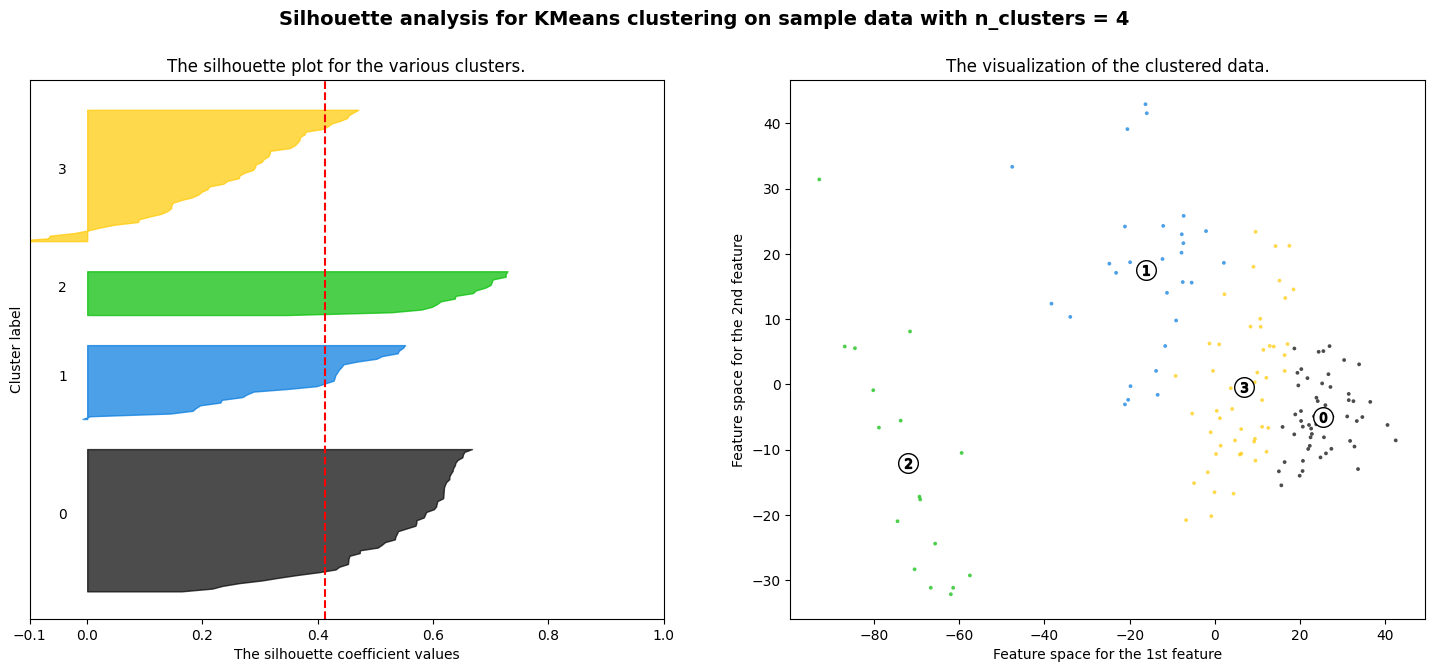

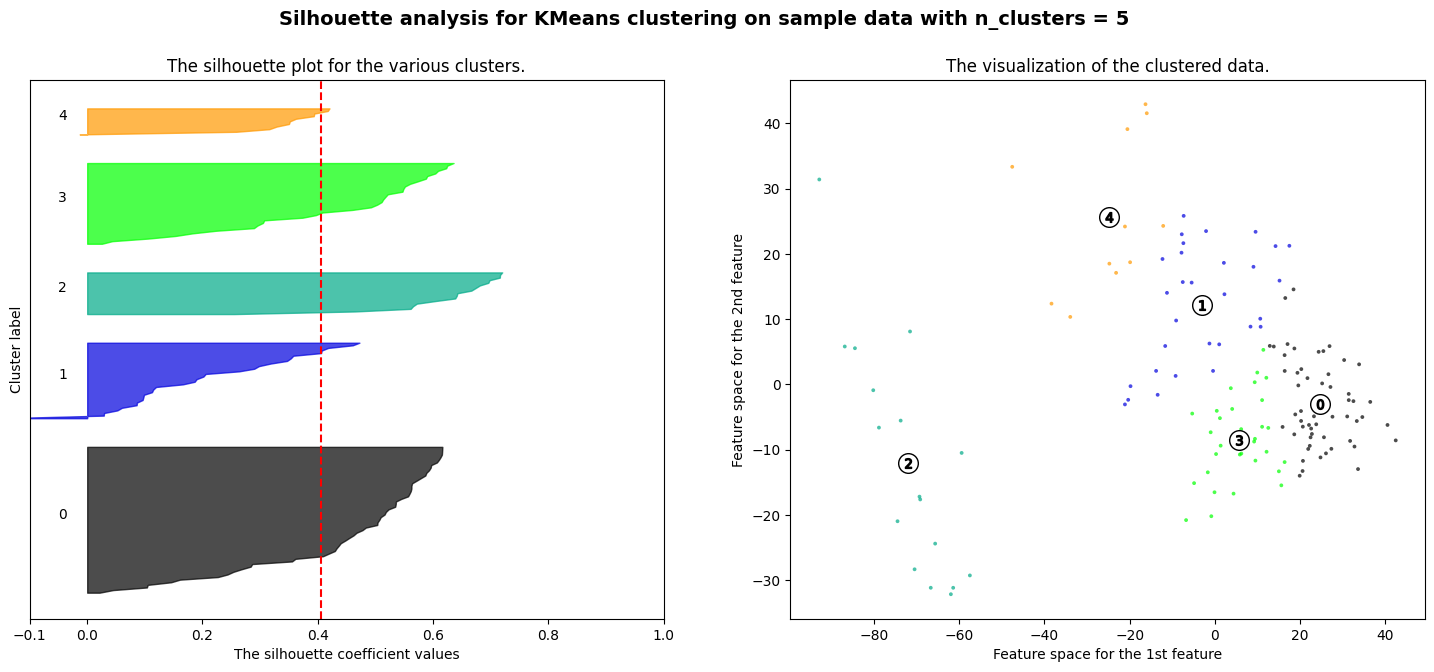

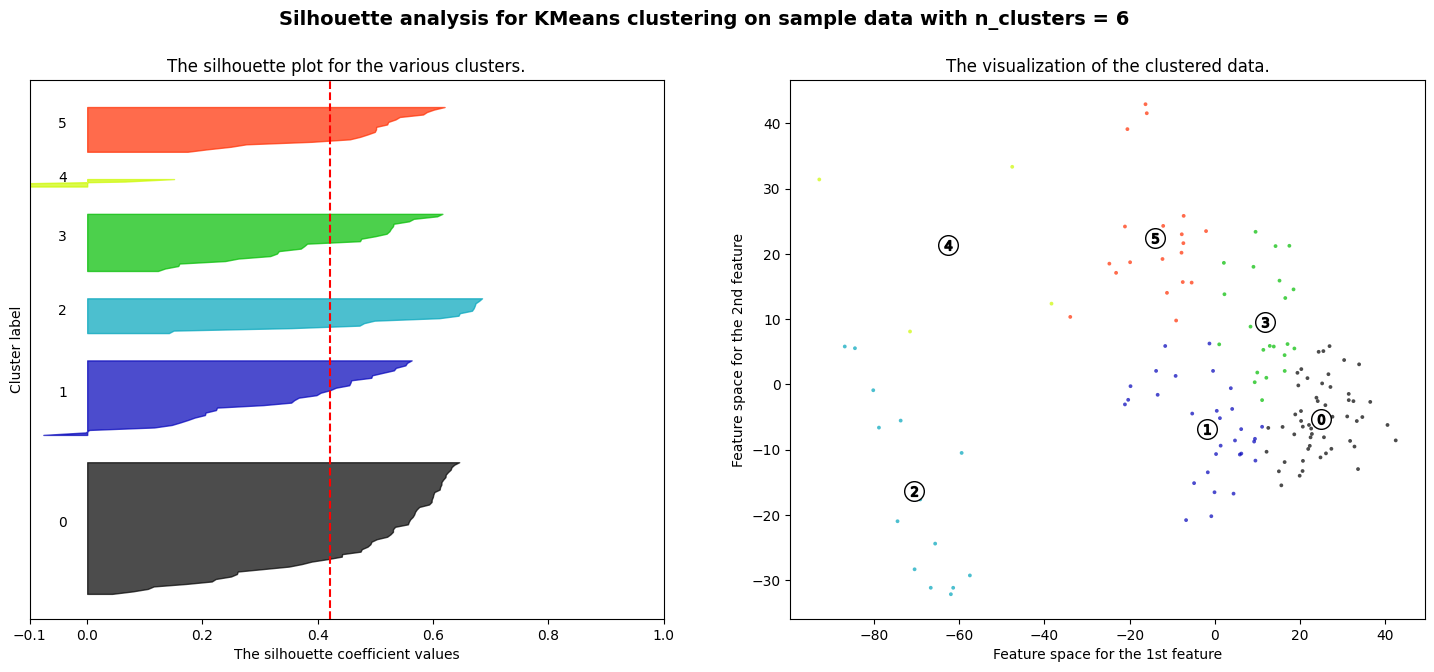

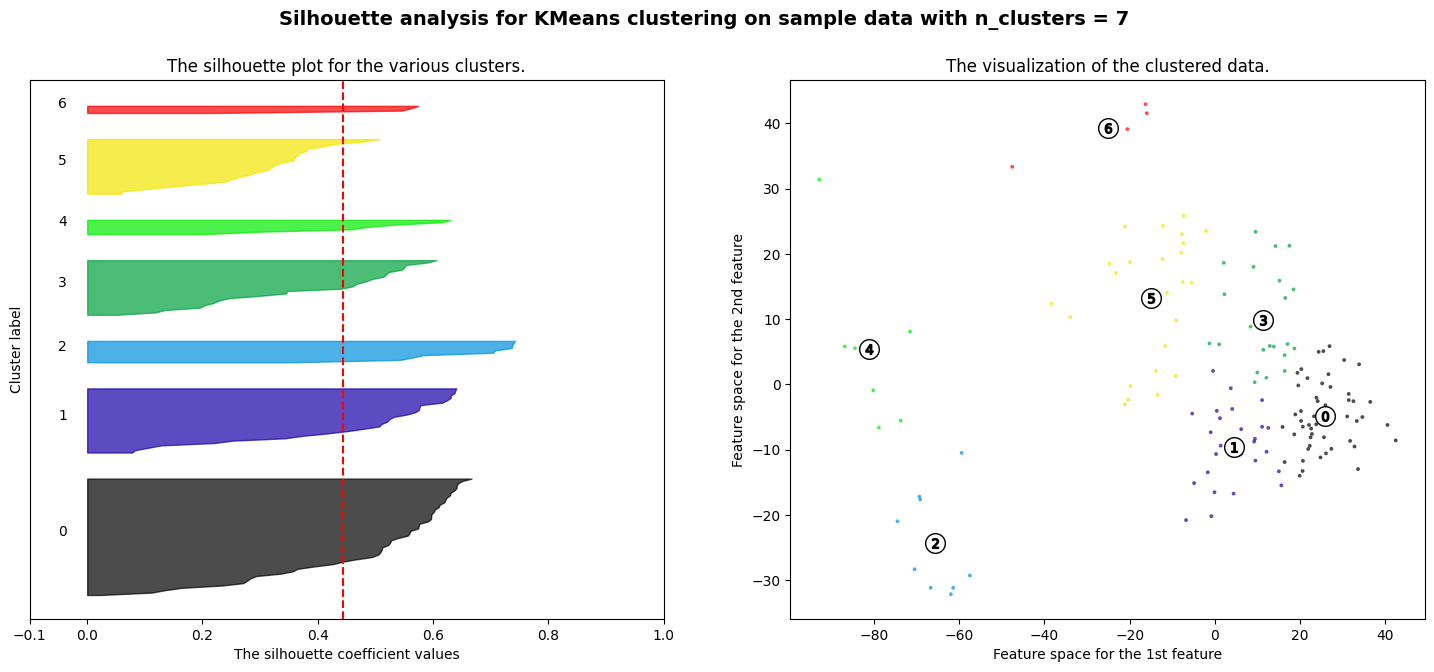

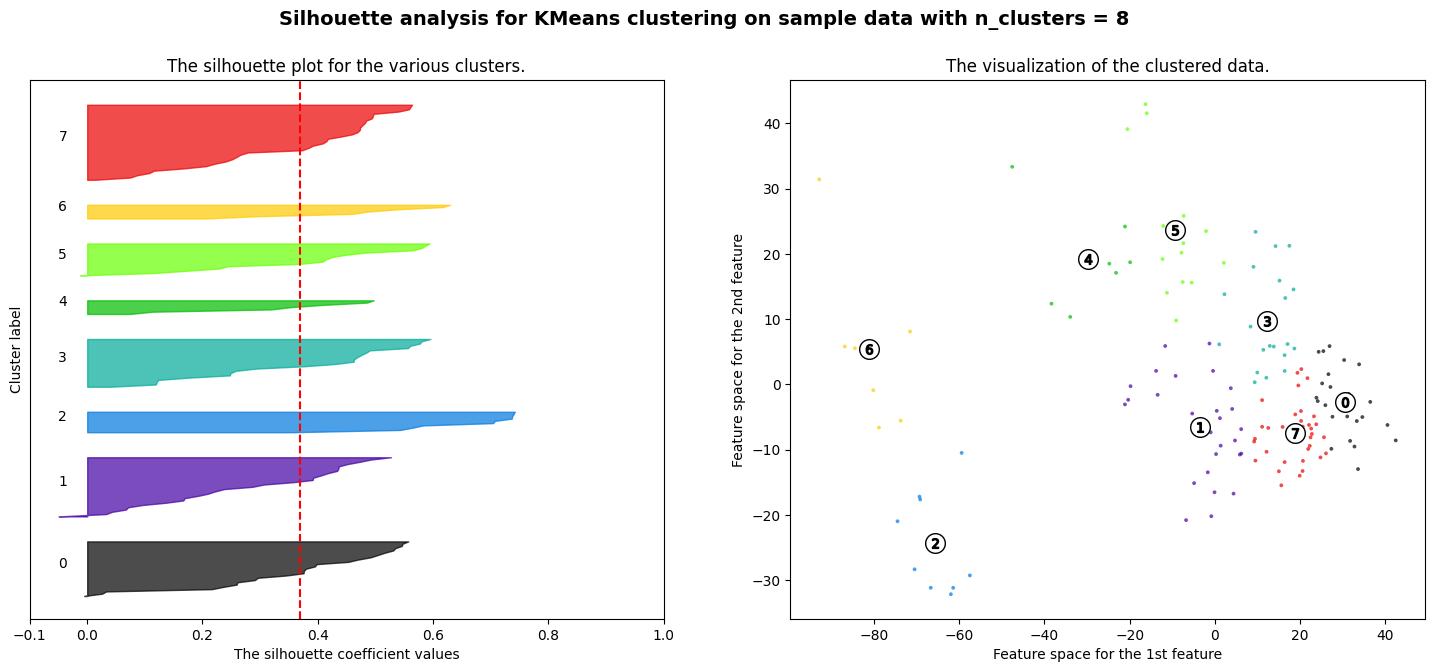

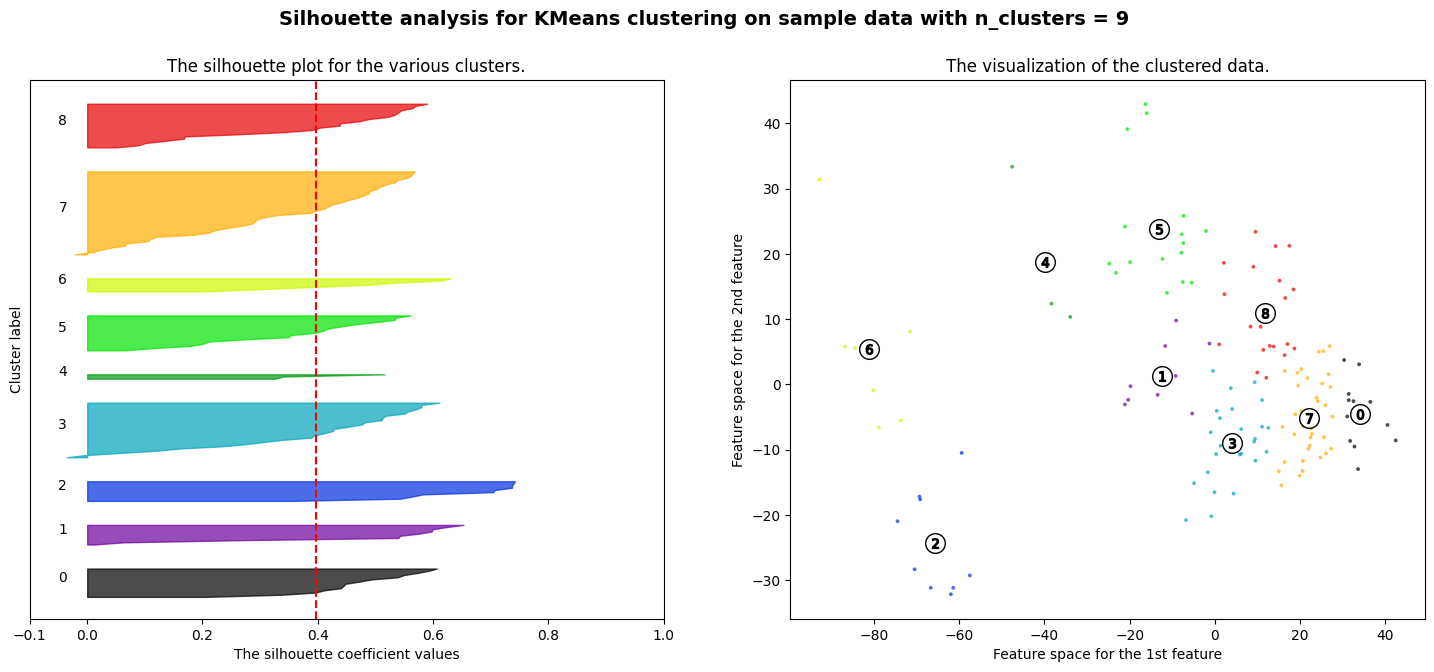

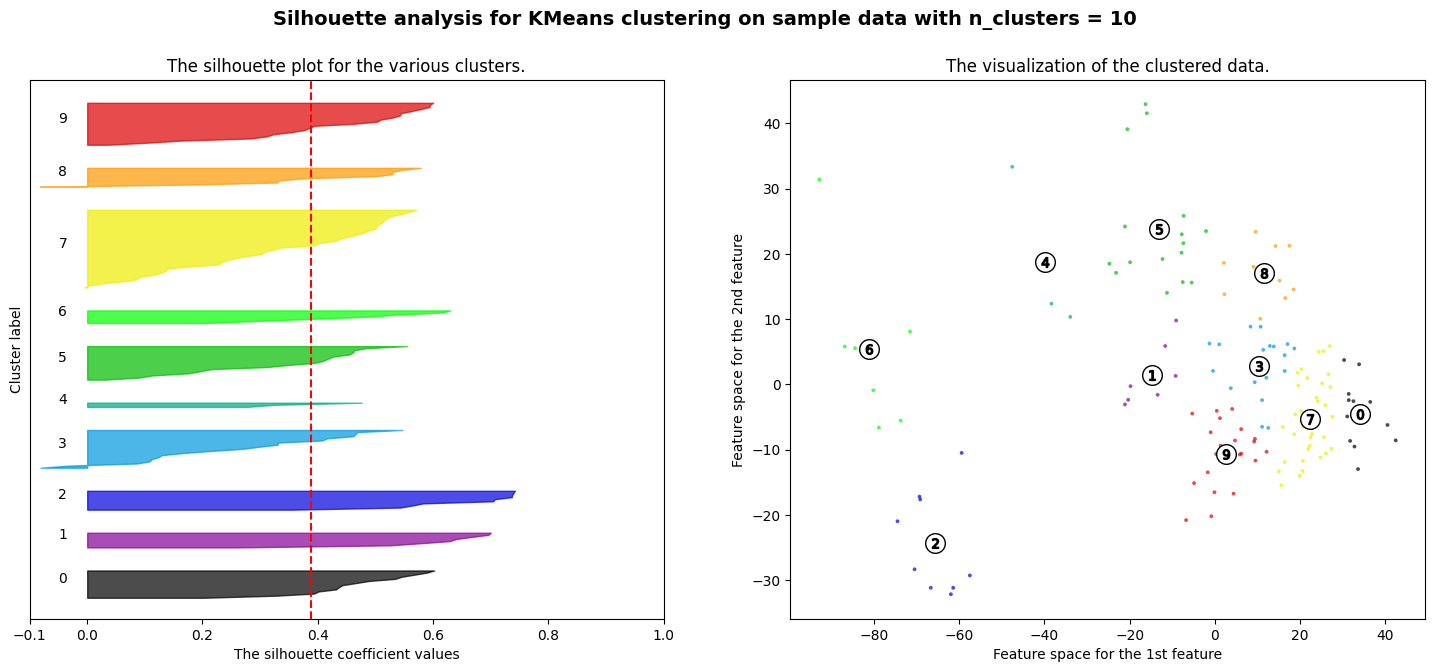

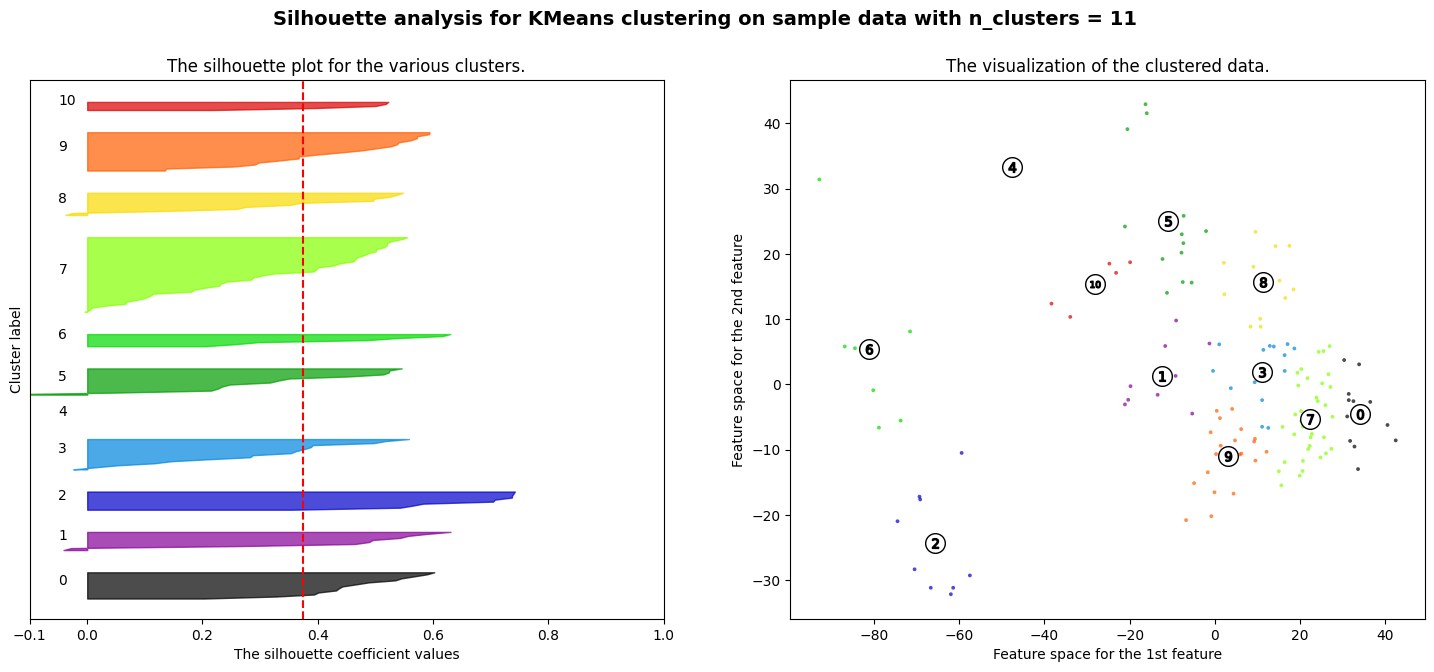

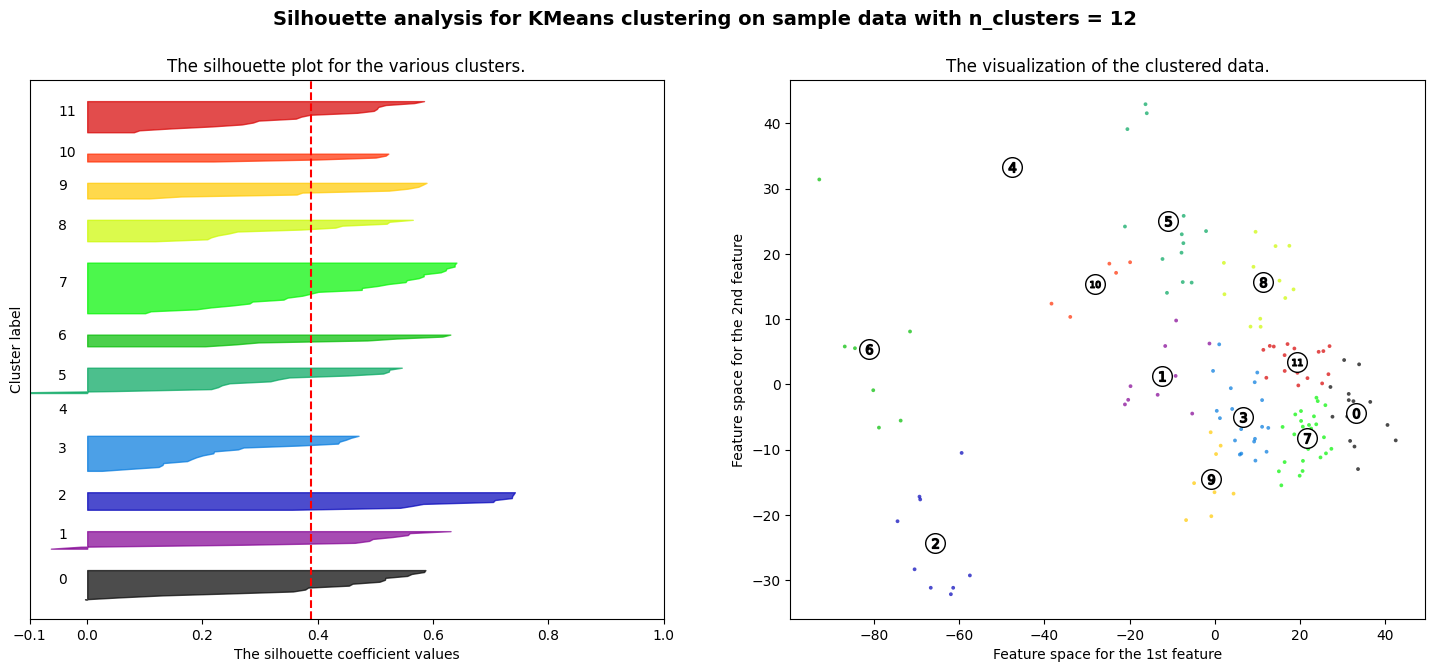

In [ ]:
from utils_clusters import get_clusters_silhouettes
from visual import draw_silhouettes

silhouettes = get_clusters_silhouettes(reduced_data, random_state)
draw_silhouettes(reduced_data, silhouettes)